In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
iris_dataset=pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/Iris.csv")
# iris_dataset.info()

TO-DO-1

In [ ]:
def logistic_function(X):
  """
Computes the logistic function applied to any value of x.
Arguments:
x: scalar or numpy array of any size.
Returns:
y: logistic function applied to x.
"""

  import numpy as np
  y = 1 / (1 + np.exp(-X))
  return y



Test case

In [ ]:
import numpy as np


TO-DO-2

In [ ]:
def log_loss(y_true,y_pred):
  """
Computes log loss for true target value y ={0 or 1} and predicted target value y’ inbetween {0-1}.
Arguments:
y_true (scalar): true target value {0 or 1}.
y_pred (scalar): predicted taget value {0-1}.
Returns:
loss (float): loss/error value
"""
  import numpy as np
  y_pred=np.clip(y_pred, 1e-10, 1-1e-10)
  loss=-(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
  return loss


In [ ]:
#veryfying loss

In [ ]:
y_true, y_pred =0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
y_true, y_pred =1, 0.9
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

log loss(0, 0.1) ==> 0.10536051565782628
log loss(1, 0.9) ==> 0.10536051565782628


In [ ]:
#test case for log loss
def test_log_loss():
 """
 Test cases for the log_loss function.
 """
 import numpy as np
# Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
 y_true = 1
 y_pred = 1
 expected_loss = 0.0 # Log loss is 0 for perfect prediction
 assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
# Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
 y_true = 0
 y_pred = 0
 expected_loss = 0.0 # Log loss is 0 for perfect prediction
 assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
# Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
 y_true = 1
 y_pred = 0
 try:
  log_loss(y_true, y_pred) # This should raise an error due to log(0)
 except ValueError:
  pass # Test passed if ValueError is raised for log(0)
# Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
 y_true = 0
 y_pred = 1
 try:
  log_loss(y_true, y_pred) # This should raise an error due to log(0)
 except ValueError:
  pass # Test passed if ValueError is raised for log(0)
# Test case 5: Partially correct prediction
 y_true = 1
 y_pred = 0.8
 expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))
 assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
 y_true = 0
 y_pred = 0.2
 expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
 assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=0, y_pred=0.2)"
 print("All tests passed!")
# Run the test case
test_log_loss()


All tests passed!


To-Do-3

In [ ]:
def cost_function(y_true, y_pred):
 """
 Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
 Args:
 y_true (array_like, shape (n,)): array of true values (0 or 1)
 y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
 Returns:
 cost (float): nonnegative cost corresponding to y_true and y_pred
 """
 assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
 n = len(y_true)
 loss_vec = log_loss(y_true, y_pred)
 cost = np.sum(loss_vec) / n
 return cost

In [ ]:
import numpy as np
def test_cost_function():
 # Test case 1: Simple example with known expected cost
 y_true = np.array([1, 0, 1])
 y_pred = np.array([0.9, 0.1, 0.8])
# Expected output: Manually calculate cost for these values
# log_loss(y_true, y_pred) for each example
 expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                 -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                 -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

# Call the cost_function to get the result
 result = cost_function(y_true, y_pred)
# Assert that the result is close to the expected cost with a tolerance of 1e-6
 assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
 print("Test passed for simple case!")
# Run the test case
test_cost_function()

Test passed for simple case!


TO-DO-4

In [ ]:
def costfunction_logreg(X,y,w,b):
  n,d=X.shape
  assert len(y)==n,"Number of feature observations and number of target observations do not match."
  assert len(w)==d,"Number of features and number of weight parameters do not match."
  # compute z using np.dot
  z=np.dot(X,w)+b
  # compute prediction using logistic function(sigmoid)
  y_pred=logistic_function(z)
  # compute the cost using the cost function
  cost= cost_function(y,y_pred)
  return cost
# testing the function
X,y,w,b= np.array([[10,20],[-10,10]]),np.array([1,0]),np.array([0.5,1.5]),1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


TO-DO-5

In [ ]:
def compute_gradient(X,y,w,b):
  n,d=X.shape
  assert len(y)==n,f"Expected y to have {n} elements, but got {len(y)}"
  assert len(w)==d,f"Expected w to have {d} elements, but got {len(w)}"
  # compute predictions using logistic function(sigmoid)
  z=np.dot(X,w)+b
  y_pred=logistic_function(z)

  # compute gradients
  grad_w=np.dot(X.T,(y_pred-y))/n
  grad_b=np.sum(y_pred-y)/n
  return grad_w,grad_b

In [ ]:
# simple text case
X=np.array([[10,20],[-10,10]])
y=np.array([1,0])
w=np.array([0.5,1.5])
b=1
# Assertion tests
try:
  grad_w,grad_b=compute_gradient(X,y,w,b)
  print("Gradients computed successfully")
  print(f"grad_w:{grad_w}")
  print(f"grad_b:{grad_b}")
except AssertionError as e:
  print(f"AssertionError: {e}")

Gradients computed successfully
grad_w:[-4.99991649  4.99991649]
grad_b:0.4999916492890759


TO-DO-6

In [ ]:
def gradient_descent(X,y,w,b,alpha, n_iter,show_cost=False,show_params=True):
  n,d=X.shape
  assert len(y)==n,"Number of observations in X and y do not match"
  assert len(w)==d,"Number of features in X and w do not match"
  cost_history=[]
  params_history=[]
  for i in range(n_iter):
    # compute gradients
    grad_w,grad_b=compute_gradient(X,y,w,b)

    # update weights and bias
    w = w - alpha*grad_w
    b =b - alpha*grad_b
    cost=costfunction_logreg(X,y,w,b)
    cost_history.append(cost)
    params_history.append((w.copy(),b))

    # optionally print cost and parameters
    if show_cost and (i% 100==0 or i==n_iter-1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
    if show_params and (i % 100==0 or i==n_iter-1):
      print(f"Iteration {i}: w = {w}, b = {b}")
  return w,b,cost_history,params_history
# test the gradient_descent function with sample data
X=np.array([[0.1,0.2],[-0.1,0.1]])
y=np.array([1,0])
w=np.zeros(X.shape[1])
b=0.0 #Scalar
alpha=0.1 #Learning rate
n_iter = 100000
# Perform gradient descent
w_out,b_out,cost_history,params_history=gradient_descent(X,y,w,b,alpha,n_iter,show_cost=True,show_params=False)
# Print final parameters and cost
print("\nFinal parameters: ")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost : {cost_history[-1]: .6f}")

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

In [ ]:
# simple assertion test for gradienr_descent
def test_gradient_descent():
  X= np.array([[0.1,0.2],[-0.1,0.1]])
  y= np.array([1,0])
  w=np.zeros(X.shape[1])
  b=0.0
  alpha =0.1
  n_iter=100
  # run gradient descent
  w_out,b_out,cost_history, _ = gradient_descent(X,y,w,b,alpha,n_iter,show_cost=False,show_params=False)
  # Assertions
  assert len(cost_history)== n_iter,"Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape,"Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float),"Bias output is not a float"
  assert cost_history[-1]< cost_history[0],"Cost did not decrease over iterations"
  print("All tests passed!")
# Run the test
test_gradient_descent()


All tests passed!


Visualizing Convergence of Cost During Gradient Descent:

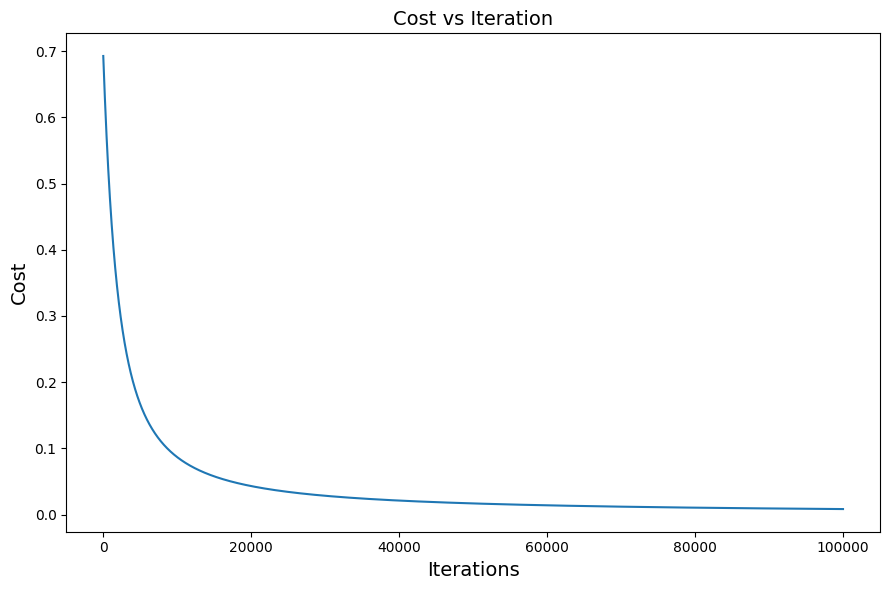

In [ ]:
# plottibg cost over iteration
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

TO-DO-7

In [ ]:
import numpy as np
def prediction(X,w,b,threshold=0.5):
  # Compute the predicted probabilities using the logistic function
  z=np.dot(X,w)+b
  y_test_prob=logistic_function(z)
  # Classify based on threshold
  y_pred=(y_test_prob>=threshold).astype(int)
  return y_pred

In [ ]:
def test_prediction():
  X_test=np.array([[0.5,1.0],[1.5,-0.5],[-0.5,-1.0]])
  w_test=np.array([1.0,-1.0])
  b_test=0.0
  threshold=0.5
  # Updated excepted output
  expected_output=np.array([0,1,1])
  # Call the prediction function
  y_pred=prediction(X_test,w_test,b_test,threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred,expected_output),f"Expected {expected_output}, but got {y_pred}"
  print("Test passed")
test_prediction()

Test passed


TO-DO-8

In [ ]:
def evaluate_classification(y_true,y_pred):
  TP=np.sum((y_true == 1) & (y_pred == 1))
  TN=np.sum((y_true == 0) & (y_pred == 0))
  FP=np.sum((y_true == 0) & (y_pred == 1))
  FN= np.sum((y_true == 1) & (y_pred == 0))
  # confusion matrix
  confusion_matrix=np.array([[TN,FP],[FN,TP]])

  # Precision,recall,and F1-score
  precision=TP/(TP+FP) if (TP+FP) > 0.0 else 0.0
  recall=TP/(TP+FN) if (TP+FN) > 0.0 else 0.0
  f1_score=2*precision*recall/(precision+recall) if (precision+recall) > 0.0 else 0.0

  # Metrics dictionary
  metric={
      "confusion_matrix":confusion_matrix,
      "precision":precision,
      "recall":recall,
      "f1_score":f1_score
  }
  return confusion_matrix,precision,recall,f1_score



1.Some Basic Data Operation, Loading Analysis and Cleaning

In [ ]:
# Load Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url,names=columns)

In [ ]:
# Data Cleaning
columns_to_clean=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data_pima_diabetes[columns_to_clean]=data_pima_diabetes[columns_to_clean].replace(0,np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(),inplace=True)
data_pima_diabetes.info()

data_pima_diabetes.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Task 2

In [ ]:
# Train-test split
X= data_pima_diabetes.drop(columns=['Outcome']).values
y=data_pima_diabetes['Outcome'].values
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

# Standardize features
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


Task3


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


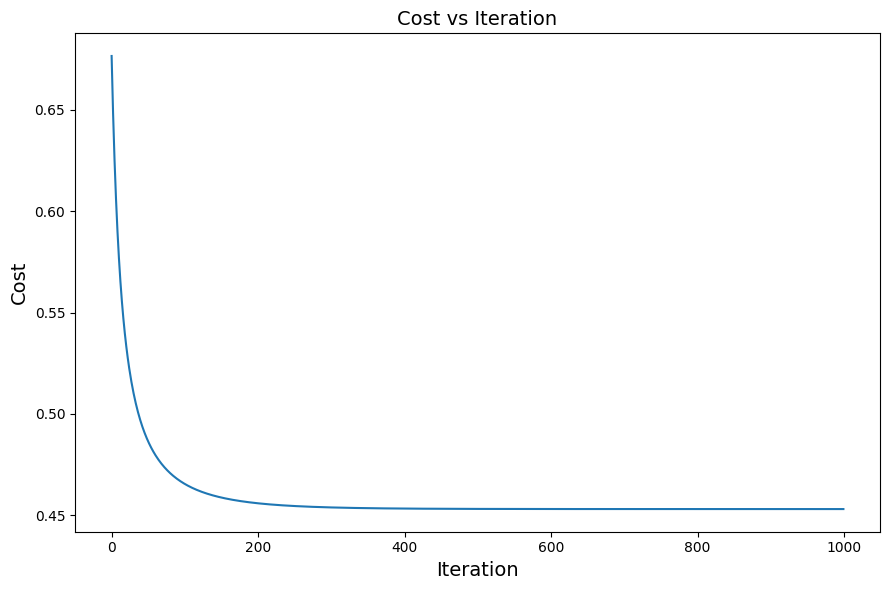

In [ ]:
# Initialize parameters
w=np.zeros(X_train_scaled.shape[1])
b=0.0
alpha=0.1
n_iter=1000

# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,show_cost=True, show_params=False)

# plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

Task 4 Did the Model Overfitt or Underfitt?

In [ ]:
#Test model
y_train_pred=prediction(X_train_scaled,w,b)
y_test_pred=prediction(X_test_scaled,w,b)

# Evaluate train and test performance
train_cost=costfunction_logreg(X_train_scaled,y_train,w,b)
test_cost=costfunction_logreg(X_test_scaled,y_test,w,b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


Task5 How well my model did?


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


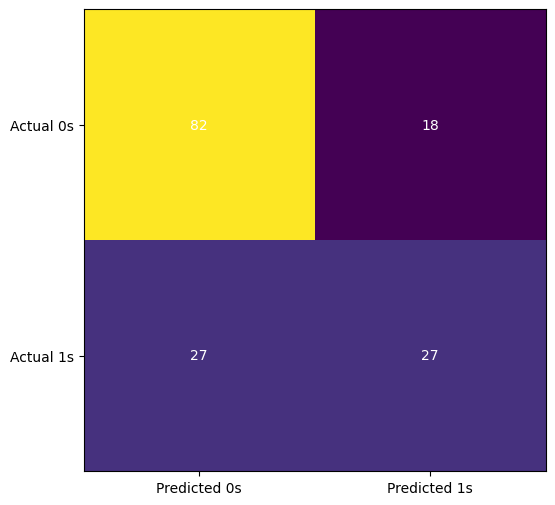

In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()